In [ ]:
import os

loc = '../input/face-mask-types-dataset/Dataset/train'

img_loc = ['cloth' , 'n95' , 'n95v' , 'nfm' , 'srg']

for img in img_loc:
    print(os.path.join(loc,img))

In [ ]:
import cv2
from tqdm import tqdm

features = []

for img in img_loc:
    k = os.path.join(loc,img)
    for i in tqdm(os.listdir(k)):
        f = cv2.imread(os.path.join(k,i))
        f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)
        f = cv2.resize(f,(100,100))
        features.append(f)

In [ ]:
import numpy as np

X = np.array(features)
X.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[688])
plt.show()

In [ ]:
labels = []

l = 0

for img in img_loc:
    k = os.path.join(loc,img)
    for i in tqdm(os.listdir(k)):
        labels.append(l)
    l += 1

In [ ]:
Y = np.array(labels)
print(Y.shape)

**ANN Model**

In [ ]:
import keras
from keras.utils import np_utils

Xt = X.reshape(1956,10000)
Xt = np_utils.normalize(Xt)

Yt = np_utils.to_categorical(Y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,train_size=0.8)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Xt[67].reshape(100,100))
plt.show()

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(1024 , activation='relu' , input_dim=10000))
model.add(layers.Dense(512 , activation='relu'))

model.add(layers.Dense(512 , activation='relu'))

model.add(layers.Dense(256 , activation='relu'))
model.add(layers.Dense(128 , activation='relu'))
model.add(layers.Dense(64 , activation='relu'))

model.add(layers.Dense(5 , activation='sigmoid'))

model.summary()

In [ ]:
#from keras import optimizers
import tensorflow as tf

#sgd = tf.keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer='sgd' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs=200, validation_data=(xtest,ytest))

In [ ]:
model.evaluate(xtrain,ytrain)

In [ ]:
model.evaluate(xtest,ytest)

**CNN - Convolutional Neural Network**

In [1]:
import os

loc = '../input/face-mask-types-dataset/Dataset/train'

img_loc = ['cloth' , 'n95' , 'n95v' , 'nfm' , 'srg']

import cv2
from tqdm import tqdm

features = []

for img in img_loc:
    k = os.path.join(loc,img)
    for i in tqdm(os.listdir(k)):
        f = cv2.imread(os.path.join(k,i))
        #f = cv2.cvtColor(f , cv2.COLOR_BGR2GRAY)      #to convert image into grayscale
        f = cv2.resize(f,(150,150))
        features.append(f)

100%|██████████| 342/342 [00:02<00:00, 151.56it/s]


In [2]:
import numpy as np

X = np.array(features)
X.shape

(1956, 150, 150, 3)

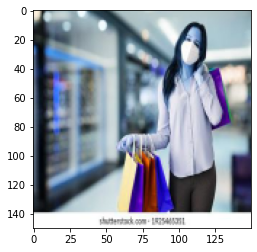

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X[688])
plt.show()

In [4]:
labels = []

l = 0

for img in img_loc:
    k = os.path.join(loc,img)
    for i in tqdm(os.listdir(k)):
        labels.append(l)
    l += 1

100%|██████████| 342/342 [00:00<00:00, 1010889.34it/s]


In [5]:
Y = np.array(labels)
print(Y.shape)

(1956,)


In [6]:
import keras
from keras.utils import np_utils

Yt = np_utils.to_categorical(Y)

In [7]:
#Z-score Normalisation
mean = np.mean(X)
std = np.std(X)

Xt = (X - mean) / std
#Xt = Xt.reshape(1956,150,150,1)      #only if image is converted into grayscale

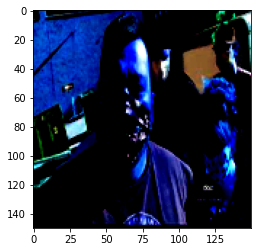

In [8]:
import matplotlib.pyplot as plt
plt.imshow(Xt[0])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xt,Yt,train_size=0.8)

In [10]:
xtrain.shape[1:]

(150, 150, 3)

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation , Flatten, Conv2D, MaxPooling2D, Dropout
from keras import regularizers
import numpy as np

In [41]:
weight_decay = 0.0001

model = Sequential()
model.add(Conv2D(32 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay) , input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(64 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(128 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(256 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(512 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(1024 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(1024 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(2048 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(Conv2D(2048 , (3,3) , padding='same' , kernel_regularizer = regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Flatten())
model.add(Dense(5 , activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
activation_14 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
activation_15 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)       

In [43]:
xtrain.shape

(1564, 150, 150, 3)

In [37]:
1564/100

15.64

In [44]:
#from keras import optimizers
#import tensorflow as tf

#sgd = tf.keras.optimizers.SGD(learning_rate = 0.1)
#model.compile(optimizer = sgd , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.compile(optimizer='sgd' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

* verbose = 0 :- will show nothing during training or silent
* verbose = 1 :- will show an animated progress bar [==========================]
* verbose = 2 :- will just mention the number of epochs like 1/20

In [45]:
model.fit(xtrain,ytrain,epochs=150, batch_size=50 , validation_data=(xtest,ytest))

Epoch 1/150
32/32 [==============================] - 11s 216ms/step - loss: 2.2827 - accuracy: 0.2308 - val_loss: 2.2831 - val_accuracy: 0.2245
Epoch 2/150
32/32 [==============================] - 5s 142ms/step - loss: 2.2810 - accuracy: 0.2500 - val_loss: 2.2820 - val_accuracy: 0.2245
Epoch 3/150
32/32 [==============================] - 5s 142ms/step - loss: 2.2777 - accuracy: 0.2519 - val_loss: 2.2816 - val_accuracy: 0.2245
Epoch 4/150
32/32 [==============================] - 5s 141ms/step - loss: 2.2763 - accuracy: 0.2666 - val_loss: 2.2818 - val_accuracy: 0.2245
Epoch 5/150
32/32 [==============================] - 5s 141ms/step - loss: 2.2727 - accuracy: 0.2858 - val_loss: 2.2823 - val_accuracy: 0.2245
Epoch 6/150
32/32 [==============================] - 5s 142ms/step - loss: 2.2666 - accuracy: 0.2973 - val_loss: 2.2811 - val_accuracy: 0.2245
Epoch 7/150
32/32 [==============================] - 5s 141ms/step - loss: 2.2611 - accuracy: 0.2960 - val_loss: 2.2810 - val_accuracy: 0.224

In [46]:
model.evaluate(xtrain,ytrain)

49/49 [==============================] - 2s 34ms/step - loss: 1.4875 - accuracy: 0.6861


[1.487511157989502, 0.6860613822937012]

In [47]:
model.evaluate(xtest,ytest)

13/13 [==============================] - 0s 31ms/step - loss: 1.7129 - accuracy: 0.6173


[1.7129367589950562, 0.6173469424247742]

In [18]:
model.predict(xtest[4].reshape(1,150,150,3))

array([[0.24790643, 0.41969037, 0.98952216, 0.26800105, 0.10277535]],
      dtype=float32)

In [19]:
np.argmax(model.predict(xtest[40].reshape(1,150,150,3)))

1

In [29]:
img_loc[np.argmax(model.predict(xtest[98].reshape(1,150,150,3)))]

'nfm'

In [30]:
img_loc[np.argmax(ytest[98])]

'nfm'

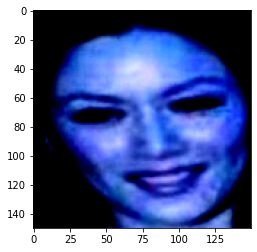

In [31]:
plt.imshow(xtest[98])
plt.show()

In [32]:
ytest_pred = np.argmax(model.predict(xtest) , axis = 1)
ytest_label = np.argmax(ytest , axis = 1)

from sklearn.metrics import confusion_matrix
confusion_matrix(ytest_label , ytest_pred)

array([[34, 25, 11,  2,  9],
       [ 2, 50, 11,  2,  2],
       [ 2, 22, 62,  2,  3],
       [ 0,  3,  2, 83,  0],
       [ 1, 21, 14,  2, 27]])

**Save the Model**

In [33]:
model.save('my_model.h5') 